# Rectified Linear Unit
---
### The Pre-ReLU Era 
- Before ReLU, activation functions like Sigmoid and Tanh were used. 
- But they caused problems like: 
  - Vanishing Gradient
  - Saturation Issues
---
#### Vanishing Gradient Problem 
- The sigmoid function outputs values in the range of (0, 1). So when x is large or small, be it positive or negative the derivative becomes close to zero.
- Which makes the weight updates very small during backpropagation and if this small gradient is multiplied across layers, it vanishes.
- For eg.
  ##### 1. Sigmoid Function
  The sigmoid activation function is defined as:
  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$
  It's derivative is given by:
  $$
  \sigma'(x) = \sigma(x) (1 - \sigma(x))
  $$
  So if, $$\sigma(x) = 0.99$$, then $$\sigma'(x) = 0.99 * (1 - 0.99) = 0.0099$$ which is tiny.
  As a result, the first layers in deep network recieve almost zero gradient updates and stop learning.
  ##### 2. Tanh Function
  The Hyperbolic Tangent (Tanh) activation function is:
  $$
  \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
  $$
  And it's derivative is:
  $$
  \tanh'(x) = 1 - \tanh^2(x)
  $$
  So if, $$\tanh(x)=0.99$$ then $$\tanh'(x) = 1 - 0.99^2 = 0.0199$$ which is still very small.
  It has no effect on the deep networks, and the network stops learning.
---
#### Saturation Problem in Sigmoid and Tanh

##### 1. Sigmoid Saturation Issue

The Sigmoid function is:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Its derivative is:

$$
\sigma'(x) = \sigma(x) (1 - \sigma(x))
$$

**Why Does Sigmoid Saturate?**
- When \( x \to \infty \), \( \sigma(x) \to 1 \) and the derivative becomes **zero**.
- When \( x \to -\infty \), \( \sigma(x) \to 0 \) and the derivative also becomes **zero**.

**Example:**
- For \( x = 5 \):

  $$
  \sigma(5) = \frac{1}{1 + e^{-5}} = 0.993
  $$

  So the derivative:

  $$
  \sigma'(5) = 0.993 \times (1 - 0.993) = 0.006
  $$

  (very small).

- For \( x = -5 \):

  $$
  \sigma(-5) = \frac{1}{1 + e^5} = 0.007
  $$

  So the derivative:

  $$
  \sigma'(-5) = 0.007 \times (1 - 0.007) = 0.006
  $$

  (very small).

Since the gradient becomes extremely small for large \( x \) values, **weight updates become insignificant** during training, slowing down learning.

---

##### 2. Tanh Saturation Issue

The Tanh function is:

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

Its derivative is:

$$
\tanh'(x) = 1 - \tanh^2(x)
$$

**Why Does Tanh Saturate?**
- When \( x \to \infty \), \( \tanh(x) \to 1 \) and the derivative approaches **zero**.
- When \( x \to -\infty \), \( \tanh(x) \to -1 \) and the derivative also approaches **zero**.

**Example:**
- For \( x = 3 \):

  $$
  \tanh(3) = \frac{e^3 - e^{-3}}{e^3 + e^{-3}} = 0.995
  $$
### Results: 
1. In the vanishing gradient problem, the derivatives becoming close to zero causes small gradients getting multiplied across layers, making weight updates insignificant, which slows down learning in deep networks.
2. In the Saturation Problem, the sigmoid and tanh functions saturate for large positive or negative inputs, making it diifficult for network to update weights, which again slows down the learning.
---
### ReLU 
The ReLU activation function is defined as: 

$$ 
ReLU(x) = \max(0, x)
$$ 

- **Example:**

    For \( x = 5 \):

    $$
    ReLU(5) = \max(0, 5) = 5
    $$

    For \( x = -3 \):

    $$
    ReLU(-3) = \max(0, -3) = 0
    $$

- It outputs the input directly if it is positive.
- Otherwise, it returns zero.

- **Derivative:**  
  The derivative of the ReLU function is:

  $$
  \frac{d}{dx} ReLU(x) = 
  \begin{cases} 
  1 & \text{if } x > 0 \\
  0 & \text{if } x < 0 
  \end{cases}
  $$

  **How ReLU Tackles the Vanishing Gradient and Saturation Problem:**

  a. ReLU addresses the Vanishing Gradient problem by providing gradient of 1 for all positive input values.
  b. Which means for positive values, the gradient remains strong and does not diminish as the network deepens. Which ensures that gradients are not lost during backpropagation.

  c. ReLU mitigates saturation by providing outputs that are either zero (for negative inputs) or linear (for positive inputs).
  d. For positive inputs, the function is linear and its derivative is constant(1), meaning the function does not saturate and continues to propagate meaningful gradients for the network. 

## Code

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

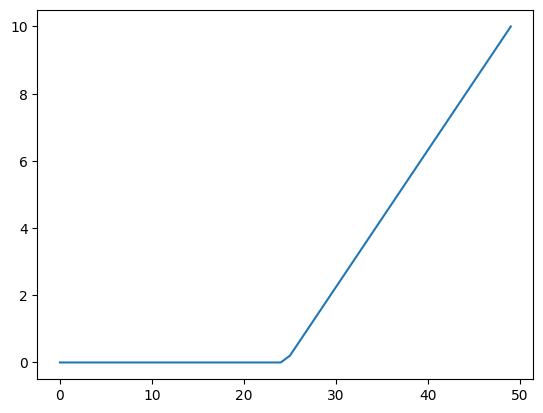

In [3]:
def ReLU(x):
    return np.maximum(x, 0)

Inputs = np.linspace(-10, 10)
relu = ReLU(Inputs)

plt.plot(relu)

In [4]:
print("ReLU: ", relu)

ReLU:  [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.20408163  0.6122449   1.02040816  1.42857143  1.83673469
  2.24489796  2.65306122  3.06122449  3.46938776  3.87755102  4.28571429
  4.69387755  5.10204082  5.51020408  5.91836735  6.32653061  6.73469388
  7.14285714  7.55102041  7.95918367  8.36734694  8.7755102   9.18367347
  9.59183673 10.        ]
